<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html exercisesweek35.do.txt  -->
<!-- dom:TITLE: Exercises week 35 -->

# Exercises week 35
**August 26-30, 2024**

Date: **Deadline is Friday August 30 at midnight**

## Exercise 1: Analytical exercises

In this exercise we derive the expressions for various derivatives of
products of vectors and matrices. Such derivatives are central to the
optimization of various cost functions. Although we will often use
automatic differentiation in actual calculations, to be able to have
analytical expressions is extremely helpful in case we have simpler
derivatives as well as when we analyze various properties (like second
derivatives) of the chosen cost functions.  Vectors are always written
as boldfaced lower case letters and matrices as upper case boldfaced
letters. You will find useful the notes from week 35 on derivatives of vectors and matrices.
See also the textbook of Faisal at al, chapter 5 and in particular sections 5.3-5.5 at <https://github.com/CompPhysics/MachineLearning/blob/master/doc/Textbooks/MathMLbook.pdf>

Show that

a)

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}} = \boldsymbol{a}^T,
$$

### **Answer:** 

If 
$$
\alpha = \boldsymbol{a}^T\boldsymbol{x},
$$ 

then 

$$
\alpha = \sum_{i = 0}^{ n-1 } a_i x_i . 
$$

Componentwise we get

$$
\frac{\partial \alpha }{\partial x_k} = \frac{\partial (\sum_{i = 0}^{ n-1 } a_i x_i)}{\partial x_k} .
$$

$a_i$ does not depend on $x$, so

$$
\frac{\partial \alpha }{\partial x_k} = \sum_{i = 0}^{ n-1 } a_i \frac{\partial x_i}{\partial x_k} 
$$

but this is 0 for all $i \neq k$, (and 1 when $i=k$) so the only remaining element of the sum is

$$
\frac{\partial \alpha }{\partial x_k} = a_k .
$$

Rewritten to vector form this is 
$$
\frac{\partial \alpha }{\partial \boldsymbol{x}} = \boldsymbol{a}^T .
$$

b)

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a})}{\partial \boldsymbol{a}} = \boldsymbol{a}^T(\boldsymbol{A}+\boldsymbol{A}^T),
$$

### **Answer:** 

Now $\alpha = \boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a} $

Assuming that the matrix $\boldsymbol{A}$ is independent of $a$ and has components $A_{ i j}$ and not $a_{i j}$ (which is really confusing for trying to take the derivative and seems to give an extra term $ \boldsymbol{a}^2 $ to the answer), then we consider

$\alpha$ as a scalar given by the sums
$$
\alpha = \sum_{i=0}^{n-1} \sum_{j=0}^{n-1} a_i A_{i j} a_j
$$

Derivative for one component is 
$$
\frac{\partial (\alpha)}{\partial a_k} = \frac{\partial \left(\sum_{i=0}^{n-1} \sum_{j=0}^{n-1} a_i A_{i j} a_j \right)}{\partial a_k}
$$

which by product rule gives
$$
\frac{\partial (\alpha)}{\partial a_k} = \left(\sum_{i=0}^{n-1} \sum_{j=0}^{n-1} \frac{\partial a_i}{\partial a_k} A_{i j} a_j \right)  + \left(\sum_{i=0}^{n-1} \sum_{j=0}^{n-1} a_i A_{i j} \frac{\partial a_j}{\partial a_k} \right)
$$

In these sums, derivatives of different components ($i, j \neq k$) gives 0, and so only the terms where the derivative has $i = k$ or or $j=k$ (respectively) remain, such that

$$
\frac{\partial (\alpha)}{\partial a_k} = \left( \sum_{j=0}^{n-1}  A_{k j} a_j \right) + \left(\sum_{i=0}^{n-1} a_i A_{i k}  \right)
$$

vector components are commutative (they are simply scalars) so we write

$$
= \left( \sum_{j=0}^{n-1}  a_j A_{k j} \right) + \left(\sum_{i=0}^{n-1} a_i A_{i k}  \right)
$$

this is recognizable to the vector form which is

$$
\frac{\partial \alpha}{\partial \boldsymbol{a}} = \frac{\partial (\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a})}{\partial \boldsymbol{a}} = \left( \boldsymbol{a}^T\boldsymbol{A}^T \right) + \left( \boldsymbol{a}^T\boldsymbol{A} \right) = \boldsymbol{a}^T \left( \boldsymbol{A}^T + \boldsymbol{A} \right)
$$

c)

$$
\frac{\partial \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)}{\partial \boldsymbol{s}} = -2\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\boldsymbol{A},
$$

### **Answer:** 

componentwise, $f(\boldsymbol{s}) = \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)$ is
$$
 f_i = \left(x_i-\sum_{j=0}^{n-1} A_{ij}s_j \right)^T\left(x_i-\sum_{j=0}^{n-1} A_{ij}s_j \right) = 
$$

d) 

and finally find the second derivative of this function with respect to the vector $\boldsymbol{s}$. If we replace the vector $\boldsymbol{s}$ with the unknown parameters $\boldsymbol{\beta}$ used to define the ordinary least squares method, we end up with the equations that determine these parameters. The matrix $\boldsymbol{A}$ is then the design matrix $\boldsymbol{X}$ and $\boldsymbol{x}$ here has to be replaced with the outputs $\boldsymbol{y}$.

The second derivative of the mean squared error is then proportional to the so-called Hessian matrix $\boldsymbol{H}=\boldsymbol{X}^T\boldsymbol{X}$.


### **Answer:** 



**Hint**: In these exercises it is always useful to write out with summation indices the various quantities. Take also a look at the weekly slides from week 35 and the various examples included there.

As an example, consider the function

$$
f(\boldsymbol{x}) =\boldsymbol{A}\boldsymbol{x},
$$

which reads for a specific component $f_i$ (we define the matrix $\boldsymbol{A}$ to have dimension $n\times n$ and the vector $\boldsymbol{x}$ to have length $n$)

$$
f_i =\sum_{j=0}^{n-1}a_{ij}x_j,
$$

which leads to

$$
\frac{\partial f_i}{\partial x_j}= a_{ij},
$$

and written out in terms of the vector $\boldsymbol{x}$ we have

$$
\frac{\partial f(\boldsymbol{x})}{\partial \boldsymbol{x}}= \boldsymbol{A}.
$$

## Exercise 2: making your own data and exploring scikit-learn

We will generate our own dataset for a function $y(x)$ where $x \in
[0,1]$ and defined by random numbers computed with the uniform
distribution. The function $y$ is a quadratic polynomial in $x$ with
added stochastic noise according to the normal distribution $\cal
{N}(0,1)$.  The following simple Python instructions define our $x$
and $y$ values (with 100 data points).

In [1]:
# used codes in chapter 1 at https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter1.html
# as base for custom codes
import numpy as np
import pandas as pd
import sklearn.linear_model as skl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
n = 100
randomness_coeff = 0.2
x = np.random.rand(n,1)
y = 2.0 + 5*(x*x) + randomness_coeff * np.random.randn(n,1)

# fancier display than numpy print
results_frame = pd.DataFrame({"x":x.flatten(), "y":y.flatten()})
display(results_frame)

,x,y
0,0.071587,2.011578
1,0.303464,2.632203
2,0.763781,4.774394
3,0.811754,5.242003
4,0.712879,4.546641
...,...,...
95,0.959719,6.972256
96,0.174523,2.133207
97,0.720466,4.743217
98,0.597583,3.941357


1. Write your own code (following the examples under the [regression notes](https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter1.html)) for computing the parametrization of the data set fitting a second-order polynomial. 


In [2210]:
# make design matrix
P = 3
# matrix should correspond to pattern
# beta_1 + beta_2*x + beta_3*x^2
feature_matrix = np.zeros((n, P))

#feature_matrix[:,0] = 1
#feature_matrix[:,1] = x[:,0]
#feature_matrix[:,2] = x[:,0]**2
#feature_matrix[:,3] = x[:,0]**3

# automated way of filling matrix
for exponent in range(0,P):
    feature_matrix[:,exponent] = x[:,0]**exponent

print("feature matrix")
df = pd.DataFrame(feature_matrix)
display(df)


feature matrix


,0,1,2
0,1.0,0.984996,0.970218
1,1.0,0.271562,0.073746
2,1.0,0.057523,0.003309
3,1.0,0.319369,0.101996
4,1.0,0.621508,0.386272
...,...,...,...
95,1.0,0.464762,0.216004
96,1.0,0.800904,0.641448
97,1.0,0.579402,0.335707
98,1.0,0.135111,0.018255


In [2211]:
# optimal beta is now given by
# beta_hat = (X^T X)^-1 X^T y
feature_transposed = np.transpose(feature_matrix)
print("feature matrix shape: ", feature_matrix.shape)
print("transposed:", feature_transposed.shape)

x_t_x = np.matmul(feature_transposed, feature_matrix)
print("X^T X shape:", x_t_x.shape)
calc_invert = np.linalg.inv(x_t_x)

beta = calc_invert.dot(feature_transposed).dot(y)
df = pd.DataFrame(beta)
print("\nbeta")
display(df)

y_tilde = feature_matrix @ beta
df = pd.DataFrame(y_tilde)
print("y tilde")
display(df)

print("add modelled y to display frame along with absolute error")
results_frame["y_tilde"] = y_tilde.flatten()
results_frame["y - y_tilde"] = y.flatten()-y_tilde.flatten()
display(results_frame)

feature matrix shape:  (100, 3)
transposed: (3, 100)
X^T X shape: (3, 3)

beta


,0
0,1.979405
1,0.105927
2,4.879416


y tilde


,0
0,6.817837
1,2.368006
2,2.001644
3,2.510918
4,3.930020
...,...
95,3.082609
96,5.194132
97,3.678832
98,2.082790


add modelled y to display frame along with absolute error


,x,y,y_tilde,y - y_tilde
0,0.984996,6.642593,6.817837,-0.175244
1,0.271562,2.645329,2.368006,0.277323
2,0.057523,2.000682,2.001644,-0.000962
3,0.319369,2.467492,2.510918,-0.043426
4,0.621508,3.810431,3.930020,-0.119589
...,...,...,...,...
95,0.464762,3.030736,3.082609,-0.051873
96,0.800904,5.154970,5.194132,-0.039162
97,0.579402,3.805824,3.678832,0.126992
98,0.135111,2.083788,2.082790,0.000998



2. Use thereafter **scikit-learn** (see again the examples in the slides for week 35) and compare with your own code. Note here that **scikit-learn** does not include, by default, the intercept. See the discussions on scaling your data in the slides for this week. This type of problems appear in particular if we fit a polynomial with an intercept. 


In [2212]:
# if this cell runs twice in a row (without running the above prediction),
# the results are wrong and y_tilde_skl changes - not sure why
clf = skl.LinearRegression().fit(feature_matrix, y)
ytilde_skl = clf.predict(feature_matrix)

In [2213]:
results_frame["scikit y_tilde"] = ytilde_skl
display(results_frame)
# similar y_tilde result

,x,y,y_tilde,y - y_tilde,scikit y_tilde
0,0.984996,6.642593,6.817837,-0.175244,6.817837
1,0.271562,2.645329,2.368006,0.277323,2.368006
2,0.057523,2.000682,2.001644,-0.000962,2.001644
3,0.319369,2.467492,2.510918,-0.043426,2.510918
4,0.621508,3.810431,3.930020,-0.119589,3.930020
...,...,...,...,...,...
95,0.464762,3.030736,3.082609,-0.051873,3.082609
96,0.800904,5.154970,5.194132,-0.039162,5.194132
97,0.579402,3.805824,3.678832,0.126992,3.678832
98,0.135111,2.083788,2.082790,0.000998,2.082790



3. Using scikit-learn, compute also the mean squared error, a risk metric corresponding to the expected value of the squared (quadratic) error defined as

$$
MSE(\boldsymbol{y},\boldsymbol{\tilde{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$

In [2214]:
def custom_mse(y_true, y_pred):
    n = len(y_true) # number of data points
    mse = (1/n) * np.sum( (y_true - y_pred)**2 )
    return mse 


In [2215]:

calculated_mse = custom_mse(y, y_tilde)                          
print(f"Calculated mean squared error: {calculated_mse:.2f}")

# scikit mean squared error
mse_skl = mean_squared_error(y, ytilde_skl)                          
print(f"Scikit mean squared error:     {mse_skl:.2f}")

Calculated mean squared error: 0.04
Scikit mean squared error:     0.04


and the $R^2$ score function.
If $\tilde{\boldsymbol{y}}_i$ is the predicted value of the $i-th$ sample and $y_i$ is the corresponding true value, then the score $R^2$ is defined as

$$
R^2(\boldsymbol{y}, \tilde{\boldsymbol{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$

where we have defined the mean value  of $\boldsymbol{y}$ as

$$
\bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i.
$$

In [2216]:
def custom_r2(y_true, y_pred):
    n = len(y_true) # number of data points
    y_mean = (1/n) * np.sum(y_true)
    r2 =  1 - ((np.sum( (y_true - y_pred)**2) ) / (np.sum( (y_true - y_mean)**2 )))
    return r2


In [2217]:

calculated_r2 = custom_r2(y, y_tilde)                          
print(f"Calculated R^2: {calculated_r2:.2f}")

# scikit r^2 score
skl_r2 = r2_score(y, ytilde_skl)                          
print(f"Scikit R^2:     {skl_r2:.2f}")

Calculated R^2: 0.98
Scikit R^2:     0.98


You can use the functionality included in scikit-learn. If you feel for it, you can use your own program and define functions which compute the above two functions. 
Discuss the meaning of these results. Try also to vary the coefficient in front of the added stochastic noise term and discuss the quality of the fits.

In [2218]:
# scikit predictions match manually created predictions
# with low stochastic noise, the match is almost perfect.
# fitting a second order polynomial with a second order polynomial should match well so that is as expected

# increasing noise gradually makes the results diverge, it is no longer sufficient to match a simple polynomial
# coefficient = 20 gives mse 358.28 and R^2 0.01 which is terrible
# changing polynomial degree of model (P) does not help in either case

## Exercise 3: Split data in test and training data

In this exercise we want you to to compute the MSE for the training
data and the test data as function of the complexity of a polynomial,
that is the degree of a given polynomial.  

The aim is to reproduce Figure 2.11 of [Hastie et al](https://github.com/CompPhysics/MLErasmus/blob/master/doc/Textbooks/elementsstat.pdf).
Feel free to read the discussions leading to figure 2.11 of Hastie et al. 

Our data is defined by $x\in [-3,3]$ with a total of for example $n=100$ data points. You should try to vary the number of data points $n$ in your analysis.

In [2219]:
np.random.seed()
n = 100 + np.random.randint(0, 100) # vary data points by random extra
# make data set
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print("x input data, x train, x test")
print(x.shape)
print(x_train.shape)
print(x_test.shape)

print("y data, y train, y test")
print(y.shape)
print(y_train.shape)
print(y_test.shape)

# fancier display than numpy print
results_frame_train = pd.DataFrame({"x_train":x_train.flatten(), "y_train":y_train.flatten()})
results_frame_test = pd.DataFrame({"x_test":x_test.flatten(), "y_test":y_test.flatten()})
display(results_frame_test)

x input data, x train, x test
(117, 1)
(93, 1)
(24, 1)
y data, y train, y test
(117, 1)
(93, 1)
(24, 1)


,x_test,y_test
0,1.758621,1.341763
1,2.327586,1.543504
2,2.017241,1.485863
3,0.879310,0.855575
4,-2.172414,0.032046
5,-0.465517,0.669896
6,2.793103,0.848841
7,-0.827586,0.606217
8,0.724138,0.851914
9,0.568966,0.862263


where $y$ is the function we want to fit with a given polynomial.

**a)**
Write a first code which sets up a design matrix $X$ defined by a fifth-order polynomial and split your data set in training and test data.

In [2220]:
# make design matrix
P = 5

X_train = np.zeros((len(x_train), P))
X_test = np.zeros((len(x_test), P))
for exponent in range(0,P):
    X_train[:,exponent] = x_train[:,0]**exponent
    X_test[:,exponent] = x_test[:,0]**exponent

print("feature matrix for training data")
df = pd.DataFrame(X_train)
display(df)

print("feature matrix for test data")
df = pd.DataFrame(X_test)
display(df)


feature matrix for training data


,0,1,2,3,4
0,1.0,2.172414,4.719382,10.252450,22.272564
1,1.0,-1.034483,1.070155,-1.107056,1.145231
2,1.0,1.448276,2.097503,3.037763,4.399519
3,1.0,-0.568966,0.323722,-0.184187,0.104796
4,1.0,-2.689655,7.234245,-19.457624,52.334300
...,...,...,...,...,...
88,1.0,2.068966,4.280618,8.856452,18.323693
89,1.0,2.534483,6.423603,16.280511,41.262674
90,1.0,2.637931,6.958680,18.356518,48.423229
91,1.0,2.741379,7.515161,20.601906,56.477638


feature matrix for test data


,0,1,2,3,4
0,1.0,1.758621,3.092747,5.438968,9.565082
1,1.0,2.327586,5.417658,12.610065,29.351013
2,1.0,2.017241,4.069263,8.208685,16.558900
3,1.0,0.879310,0.773187,0.679871,0.597818
4,1.0,-2.172414,4.719382,-10.252450,22.272564
5,1.0,-0.465517,0.216706,-0.100881,0.046962
6,1.0,2.793103,7.801427,21.790192,60.862261
7,1.0,-0.827586,0.684899,-0.566813,0.469087
8,1.0,0.724138,0.524376,0.379720,0.274970
9,1.0,0.568966,0.323722,0.184187,0.104796


**b)**
Write thereafter (using either **scikit-learn** or your matrix inversion code using for example **numpy**)
and perform an ordinary least squares fitting and compute the mean squared error for the training data and the test data. These calculations should apply to a model given by a fifth-order polynomial.  If you compare your own code with _scikit_learn_, not that the latter does not include by default the intercept. See the discussions on scaling your data in the slides for this week.

In [2221]:
# optimal beta is given by
# beta_hat = (X^T X)^-1 X^T y

x_t_x = np.matmul(X_train.T, X_train)
print("X^T X shape:", x_t_x.shape)
calc_invert = np.linalg.inv(x_t_x)

beta = calc_invert.dot(X_train.T).dot(y_train)
df = pd.DataFrame(beta)
print("\nbeta")
display(df)

y_tilde = X_train @ beta

print("add modelled y to display frame along with absolute error")
results_frame_train["y_tilde"] = y_tilde.flatten()
results_frame_train["y_train - y_tilde"] = y_train.flatten()-y_tilde.flatten()
display(results_frame_train)

# prediction
y_pred = X_test @ beta

print("predicted y compared with test y and their error")
results_frame_test["y_predict"] = y_pred.flatten()
results_frame_test["y_test - y_predict"] = y_test.flatten()-y_pred.flatten()
display(results_frame_test)

calculated_mse = custom_mse(y_test, y_pred)                          
print(f"Calculated mean squared error: {calculated_mse:.2f}")

calculated_r2 = custom_r2(y_test, y_pred)                          
print(f"Calculated R^2: {calculated_r2:.2f}")

X^T X shape: (5, 5)

beta


,0
0,0.868955
1,0.470935
2,-0.053597
3,-0.040733
4,-0.000521


add modelled y to display frame along with absolute error


,x_train,y_train,y_tilde,y_train - y_tilde
0,2.172414,1.406952,1.209855,0.197097
1,-1.034483,0.414018,0.368921,0.045097
2,1.448276,1.248080,1.312549,-0.064469
3,-0.568966,0.777193,0.591107,0.186087
4,-2.689655,-0.056246,-0.020152,-0.036094
...,...,...,...,...
88,2.068966,1.383523,1.243575,0.139948
89,2.534483,1.162103,1.033586,0.128517
90,2.637931,1.044954,0.965331,0.079623
91,2.741379,0.909007,0.888564,0.020444


predicted y compared with test y and their error


,x_test,y_test,y_predict,y_test - y_predict
0,1.758621,1.341763,1.304858,0.036905
1,2.327586,1.543504,1.145784,0.397721
2,2.017241,1.485863,1.257850,0.228014
3,0.879310,0.855575,1.213608,-0.358033
4,-2.172414,0.032046,-0.001056,0.033103
5,-0.465517,0.669896,0.642197,0.027699
6,2.793103,0.848841,0.846892,0.001949
7,-0.827586,0.606217,0.465351,0.140866
8,0.724138,0.851914,1.166262,-0.314347
9,0.568966,0.862263,1.111993,-0.249730


Calculated mean squared error: 0.03
Calculated R^2: 0.89


**c)**
Add now a model which allows you to make polynomials up to degree $15$.  Perform a standard OLS fitting of the training data and compute the MSE for the training and test data and plot both test and training data MSE as functions of the polynomial degree. 

In [2222]:
def make_feature_matrix(x, P):
    X = np.zeros((len(x), P))
    for exponent in range(0,P):
        X[:,exponent] = x[:,0]**exponent

    return X

def linear_regression_model(X, y):
    beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    # from https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter1.html#linear-regression-basic-elements

    return beta

def linear_prediction(X, beta):
    y_tilde = X @ beta

    return y_tilde                
    


number of data points: 50
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


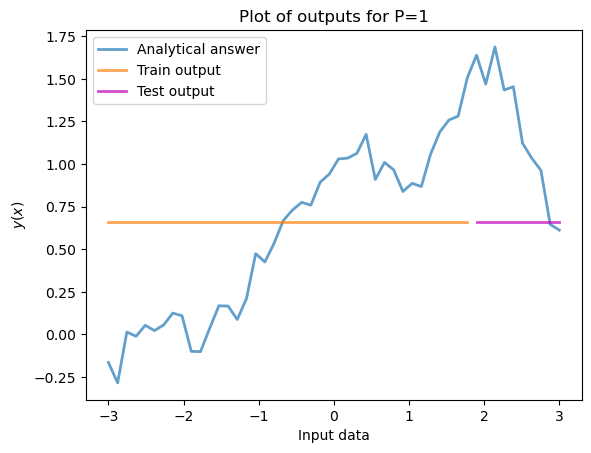

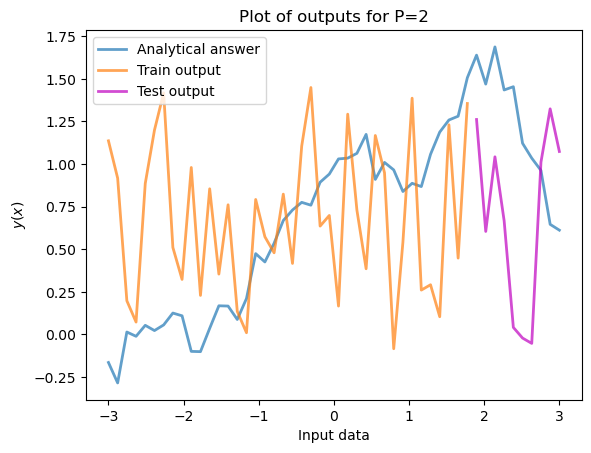

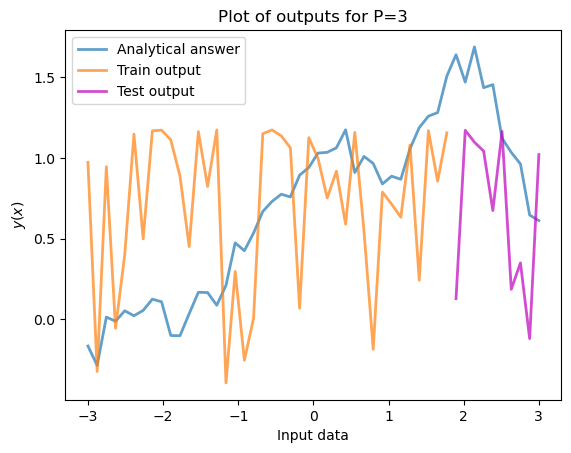

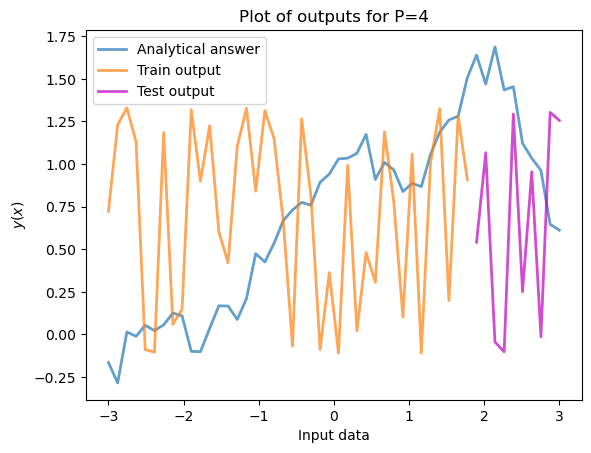

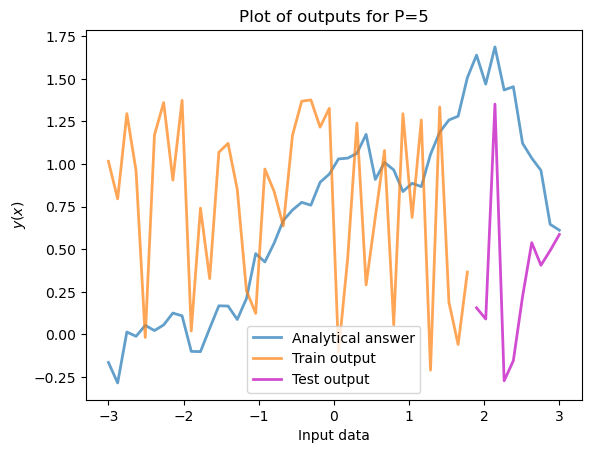

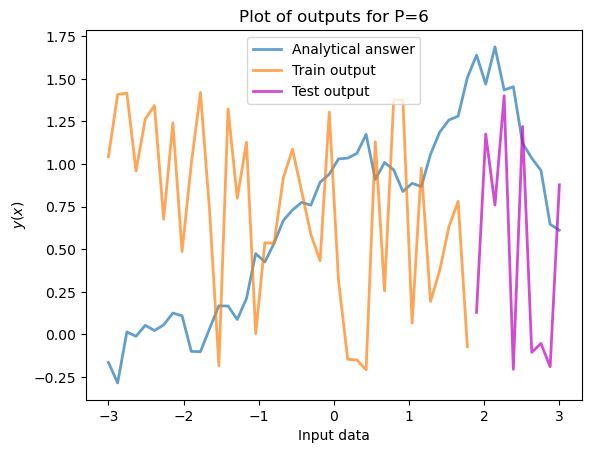

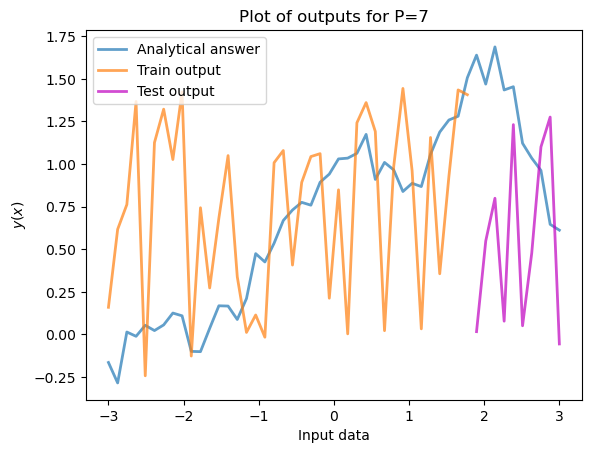

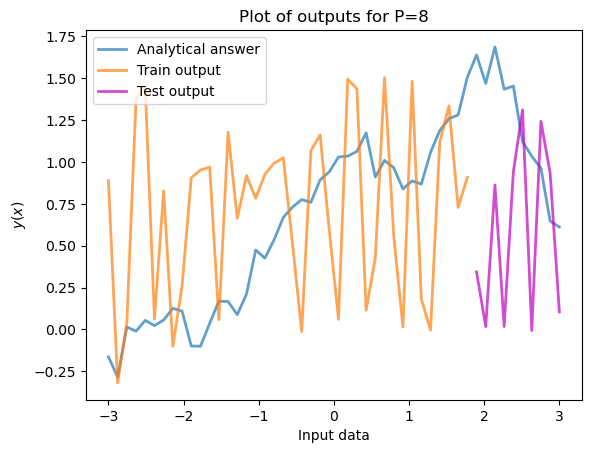

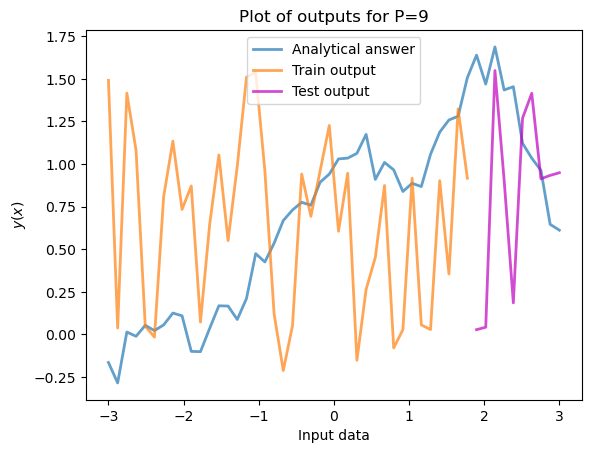

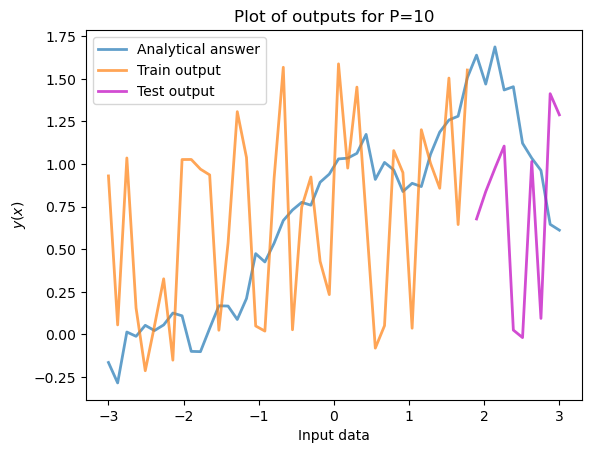

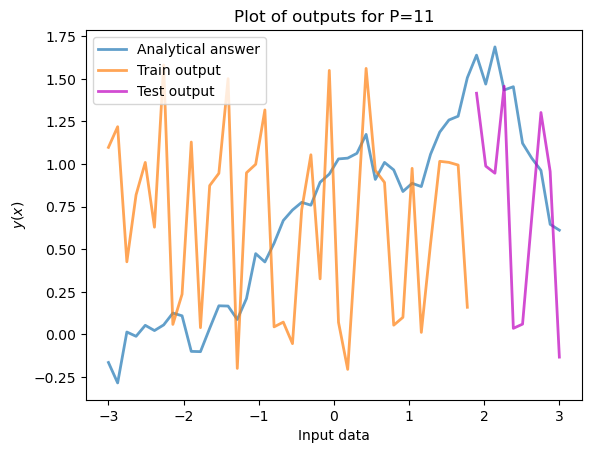

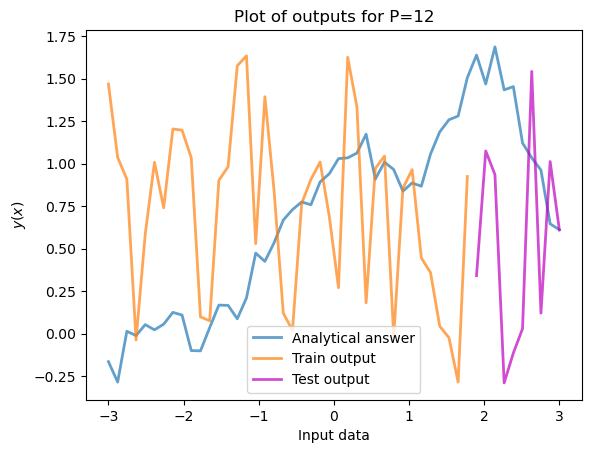

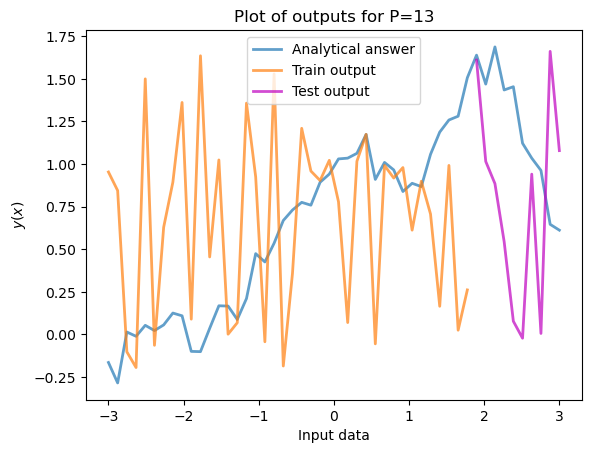

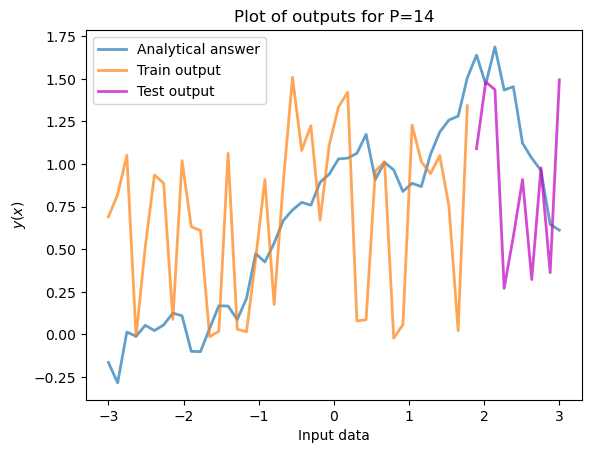

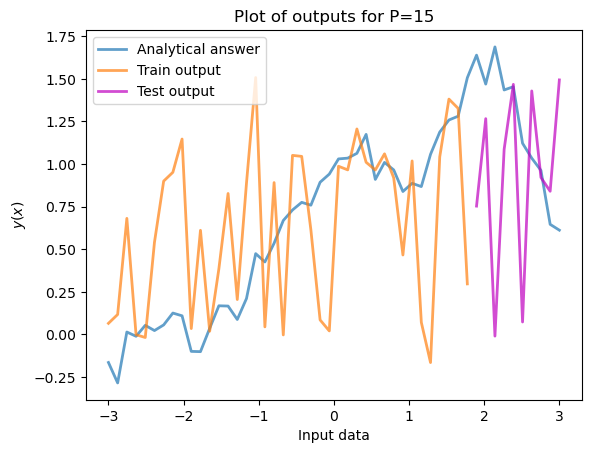

In [2223]:
# input data
np.random.seed()

#n = 100 + np.random.randint(0, 1000)
n = 50
print(f"number of data points: {n}")

x_full = np.linspace(-3, 3, n).reshape(-1, 1)
y_full = np.exp(-x_full**2) + 1.5 * np.exp(-(x_full-2)**2) + np.random.normal(0, 0.1, x_full.shape)

P = 15
features_list = list(range(1, P+1))
print(features_list)

train_mses_list = []
train_r2_list = []
train_skl_mses_list = []
train_skl_r2_list = []

test_mses_list = []
test_r2_list = []
test_skl_mses_list = []
test_skl_r2_list = []
for features in features_list:
    calc_feature_matrix = make_feature_matrix(x_full, features)

    X_train, X_test, y_train, y_test = train_test_split(calc_feature_matrix, y_full, test_size=0.2)

    # manual method
    calc_beta = linear_regression_model(X_train, y_train)
    y_tilde = linear_prediction(X_train, calc_beta)
    y_prediction = linear_prediction(X_test, calc_beta)

    # scikit method
    lin_model = skl.LinearRegression()
    lin_model.fit(X_train, y_train)
    y_tilde_skl = lin_model.predict(X_train)
    y_prediction_skl = lin_model.predict(X_test)

    #results_frame_test = pd.DataFrame({"x_test":x_full[len(y_train):].flatten(), "y_test":y_test.flatten()})
    #results_frame_test["y_prediction"] = y_prediction.flatten()

    #display(results_frame_test)

    # mse score
    train_calculated_mse = custom_mse(y_train, y_tilde)
    train_mses_list.append(train_calculated_mse)

    # scikit mse score
    skl_mse = mean_squared_error(y_train, y_tilde) 
    train_skl_mses_list.append(skl_mse)

    # r^2 score
    train_calculated_r2 = custom_r2(y_train, y_tilde)
    train_r2_list.append(train_calculated_r2)

    # scikit r^2 score
    skl_r2 = r2_score(y_train, y_tilde)
    train_skl_r2_list.append(skl_r2)

    #print(f"Train data mean squared error: {train_calculated_mse:.3f}")
    #print(f"Train data R^2: {train_calculated_r2:.3f}")

    #print()

    # mse score
    test_calculated_mse = custom_mse(y_test, y_prediction)
    test_mses_list.append(test_calculated_mse)

    # scikit mse score
    skl_mse = mean_squared_error(y_test, y_prediction) 
    test_skl_mses_list.append(skl_mse)
    
    # r^2 score
    test_calculated_r2 = custom_r2(y_test, y_prediction)
    test_r2_list.append(test_calculated_r2)

    # scikit r^2 score
    skl_r2 = r2_score(y_test, y_prediction)
    test_skl_r2_list.append(skl_r2)

    #print(f"Test data mean squared error: {test_calculated_mse:.3f}")
    #print(f"Test data R^2: {test_calculated_r2:.3f}")

    fig, ax = plt.subplots()
    ax.set_xlabel(r'Input data')
    ax.set_ylabel(r'$y(x)$')
    ax.plot(x_full, y_full, alpha=0.7, lw=2,
                label='Analytical answer')
    ax.plot(x_full[:len(y_train)], y_tilde, alpha=0.7, lw=2,
                label='Train output')
    ax.plot(x_full[len(y_train):], y_prediction, alpha=0.7, lw=2, c='m',
                label='Test output')
    ax.legend()
    ax.set_title(f"Plot of outputs for P={features}")
    plt.show()

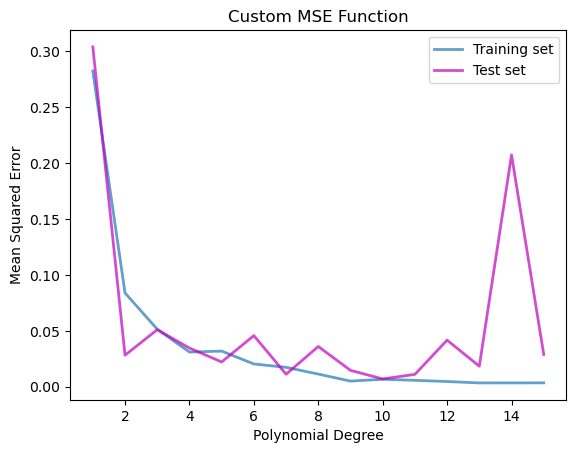

In [2224]:
fig, ax = plt.subplots()
ax.set_xlabel(r'Polynomial Degree')
ax.set_ylabel(r'Mean Squared Error')
ax.plot(features_list, train_mses_list, alpha=0.7, lw=2,
            label='Training set')
ax.plot(features_list, test_mses_list, alpha=0.7, lw=2, c='m',
            label='Test set')
ax.legend()
ax.set_title("Custom MSE Function")
plt.show()

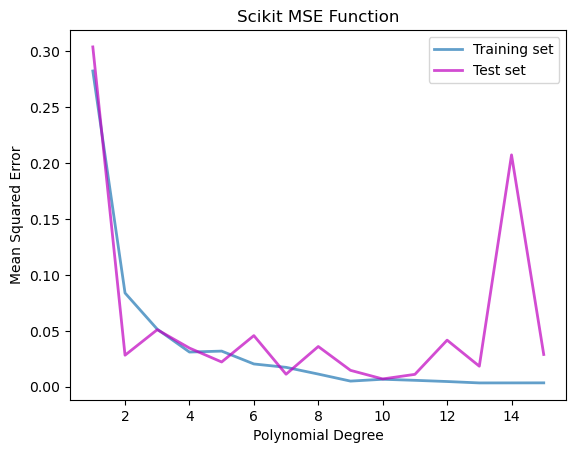

In [2225]:
fig, ax = plt.subplots()
ax.set_xlabel(r'Polynomial Degree')
ax.set_ylabel(r'Mean Squared Error')
ax.plot(features_list, train_skl_mses_list, alpha=0.7, lw=2,
            label='Training set')
ax.plot(features_list, test_skl_mses_list, alpha=0.7, lw=2, c='m',
            label='Test set')
ax.legend()
ax.set_title("Scikit MSE Function")
plt.show()

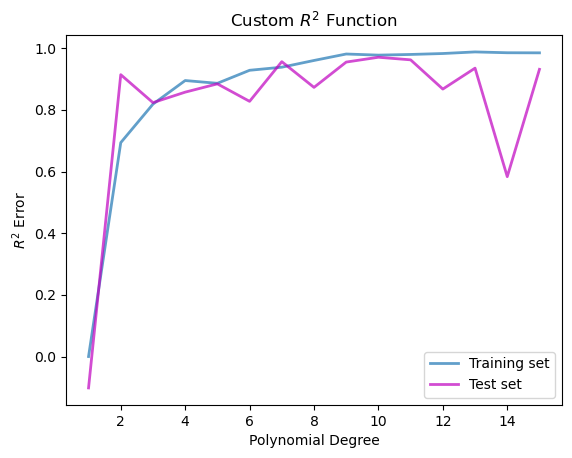

In [2226]:
fig, ax = plt.subplots()
ax.set_xlabel(r'Polynomial Degree')
ax.set_ylabel(r'$R^2$ Error')
ax.plot(features_list, train_r2_list, alpha=0.7, lw=2,
            label='Training set')
ax.plot(features_list, test_r2_list, alpha=0.7, lw=2, c='m',
            label='Test set')
ax.legend()
ax.set_title(r"Custom $R^2$ Function")
plt.show()

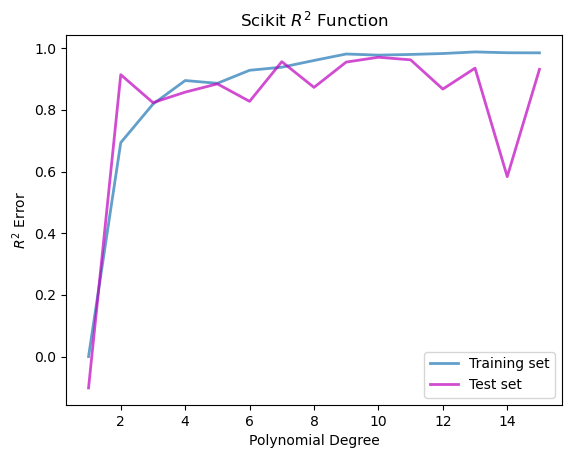

In [2227]:
fig, ax = plt.subplots()
ax.set_xlabel(r'Polynomial Degree')
ax.set_ylabel(r'$R^2$ Error')
ax.plot(features_list, train_skl_r2_list, alpha=0.7, lw=2,
            label='Training set')
ax.plot(features_list, test_skl_r2_list, alpha=0.7, lw=2, c='m',
            label='Test set')
ax.legend()
ax.set_title(r"Scikit $R^2$ Function")
plt.show()

Compare what you see with Figure 2.11 of Hastie et al. Comment your results. For which polynomial degree do you find an optimal MSE (smallest value)?

In [2228]:
# not nearly as smooth as fig 2.11
# training and test errors diverge only a little, unsure as to why
# plotting the y output gives pretty bad results above


# Error starts very high but drops quickly with increasing complexity, around 5 and above supposedly matches almost perfectly according to 
# both R^2 and MSE, with both manual and scikit methods
# but increasing the degree too high, to 10-12-ish and above gives worse and worse results

# as expected from overfitting the model
# between 5 and 10 is best, say polynomial of degree 8